In [4]:
%matplotlib inline

import sys, os  # include modules to the path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(parent_dir)
sys.path.append(os.path.join(parent_dir, 'session'))
#sys.path.append(os.path.join(parent_dir, 'postprocessing'))

import os
import numpy as np
import h5py, json
import matplotlib.pyplot as plt

from scipy import stats as scipystats
from datetime import datetime
from session.utils import session_to_numbers
from session.lists import processed_008228, processed_008229
from session.adapters import EPOCH_NAMES, H5NAMES

np.set_printoptions(suppress=True)

In [5]:
source   = '/home/sobolev/nevermind/Andrey/data'
source = '/Users/andrey/nevermind/AG_Pecka/data/processed/'

#animals  = ['008228', '008229']

## Building MFR / SPA datasets

In [4]:
ds_mfr = []
ds_spa = []

for session in processed_008228 + processed_008229:
    a_code, s_code = session_to_numbers(session)
    
    h5path = os.path.join(source, "00%s" % a_code, session, "%s.h5" % session)

    with h5py.File(h5path, 'r') as f:
        unit_names = [name for name in f['units']]
        
    for unit in unit_names:
        with h5py.File(h5path, 'r') as f:
            f_info = np.array(f['units'][unit][H5NAMES.spat_info['name']])
            mfr    = np.array(f['units'][unit][H5NAMES.mfr['name']])
            
        unit_spl = unit.split('-')
        rec_left = np.array([a_code, s_code, float(unit_spl[0]), float(unit_spl[1])])
        ds_mfr.append(np.concatenate([rec_left, mfr]))
        ds_spa.append(np.concatenate([rec_left, f_info]))
        
ds_mfr = np.array(ds_mfr)
ds_spa = np.array(ds_spa)

## SPA histograms

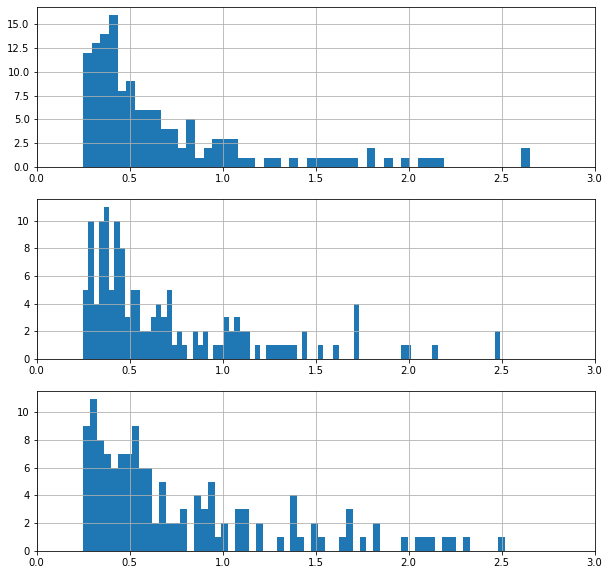

In [85]:
ds_spa1 = ds_spa[(ds_spa[:, 4] > 0.25) & (ds_spa[:, 5] > 0.25) & (ds_spa[:, 6] > 0.25)]
ds_spa2 = ds_spa1[ds_spa1[:, 1] > 22051800]

fig = plt.figure(figsize=(10, 10))

for i in range(3):
    ax = fig.add_subplot(3, 1, i+1)
    ax.hist(ds_spa2[:, i+4], 80)
    ax.set_xlim(0, 3)
    ax.grid()

In [86]:
ds_spa2[:, 0:4]

array([[    8228., 22062210.,        2.,        3.],
       [    8228., 22062210.,        2.,        4.],
       [    8228., 22062210.,        2.,        5.],
       [    8228., 22062210.,        3.,       11.],
       [    8228., 22062210.,        3.,        2.],
       [    8228., 22062210.,        3.,        4.],
       [    8228., 22062210.,        3.,        8.],
       [    8228., 22062315.,        2.,       10.],
       [    8228., 22062315.,        2.,       11.],
       [    8228., 22062315.,        2.,       12.],
       [    8228., 22062315.,        2.,       14.],
       [    8228., 22062315.,        2.,        2.],
       [    8228., 22062315.,        2.,        5.],
       [    8228., 22062315.,        3.,       10.],
       [    8228., 22062315.,        3.,       12.],
       [    8228., 22062315.,        3.,       13.],
       [    8228., 22062315.,        3.,       16.],
       [    8228., 22062315.,        3.,       17.],
       [    8228., 22062315.,        3.,      

In [73]:
ds_mfr.shape

(1054, 8)

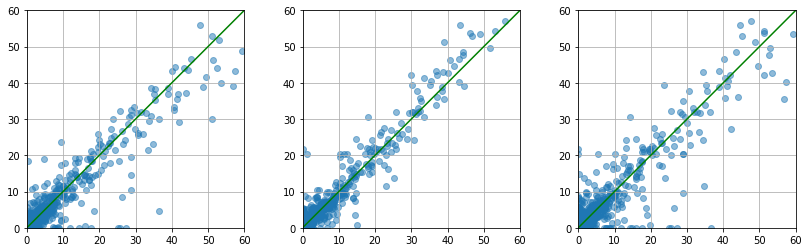

In [62]:
fig = plt.figure(figsize=(14, 4))

for i, pair in enumerate([(4, 5), (5, 6), (4, 6)]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(ds_mfr[:, pair[0]], ds_mfr[:, pair[1]], alpha=0.5)
    ax.plot([0, 60], [0, 60], color='green')
    ax.set_aspect('equal')
    ax.set_xlim(0, 60)
    ax.set_ylim(0, 60)
    ax.grid()

In [58]:
lim = 2  # Hz
ds_s1 = ds_mfr[(ds_mfr[:, 4] < lim) & (ds_mfr[:, 5] < lim)]

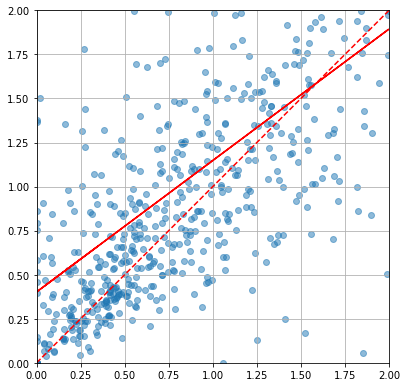

In [59]:
fig = plt.figure(figsize=(16, 16))

x_vals, y_vals = ds_s1[:, 4], ds_s1[:, 5]

ax = fig.add_subplot(131)
ax.scatter(x_vals, y_vals, alpha=0.5)
ax.set_aspect('equal')
ax.plot([0, lim], [0, lim], ls='--', color='red')
ax.plot(x_vals, intercept + slope*x_vals, color='red')
ax.grid()
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
fig.tight_layout()

slope, intercept, r_value, p_value, std_err = scipystats.linregress(x_vals, y_vals)
st, pv = scipystats.kruskal(x_vals, y_vals)

In [60]:
st, pv, slope, p_value

(6.051048202890981,
 0.01389804403847066,
 0.6618641083363263,
 7.876833532594473e-67)